In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# image classes or categories
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))

Number of Training Samples:  60000
Number of Validation Samples:  10000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (10000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)


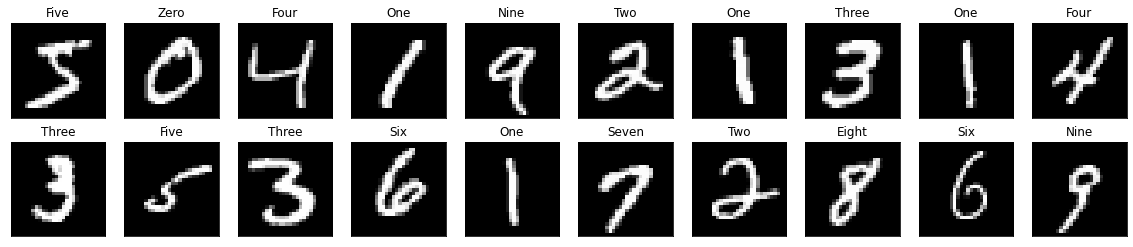

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
input_shape = (28, 28, 1)
batch_size = 32
epochs = 5

In [ ]:
# create model
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(56, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                         ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 56)                43960     
                                                                 
 dense_1 (Dense)             (None, 56)                3192      
                                                                 
 dense_2 (Dense)             (None, 10)                570       
                                                                 
Total params: 47,722
Trainable params: 47,722
Non-trainable params: 0
_________________________________________________________________
None


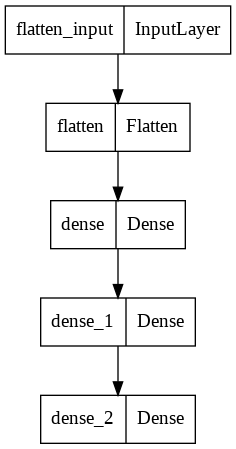

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# compile the model
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [ ]:
# Fit the model on dataset
history = model.fit(x_train, y_train,
                    validation_data = (x_val, y_val),
                    batch_size = batch_size,
                    epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2947 - accuracy: 0.9150 - val_loss: 0.1422 - val_accuracy: 0.9566
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1291 - accuracy: 0.9616 - val_loss: 0.1088 - val_accuracy: 0.9684
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0945 - accuracy: 0.9712 - val_loss: 0.1045 - val_accuracy: 0.9685
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0747 - accuracy: 0.9769 - val_loss: 0.1001 - val_accuracy: 0.9702
Epoch 5/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9836 - val_loss: 0.0859 - val_accuracy: 0.9743
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9846 - val_loss: 0.1046 - val_accuracy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
x_test, y_test = x_val[:1000], y_val[:1000]

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_test, y_test)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.1522 - accuracy: 0.9720

Model Accuracy on test images:  0.972
Model Loss on test images:  0.1522


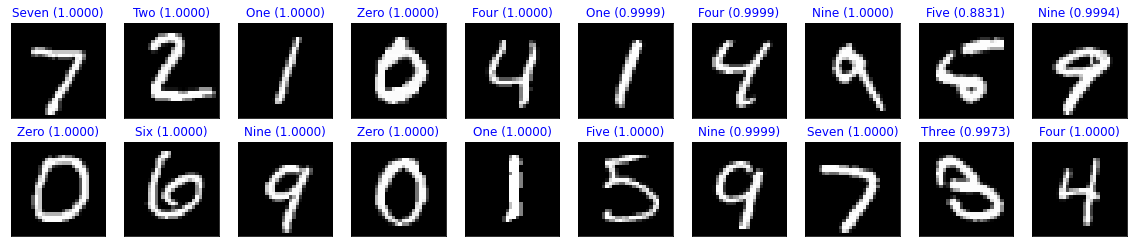

In [ ]:
# predict some testing images
predictions = model.predict(x_val)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)

**Gradient Based Attack**

## 1. Fast Gradient Sign Attack and Reconstruction of Adversarial Example

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.FGSM()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.08)

# adversarial purtubation
perturb = adv_img - x_test

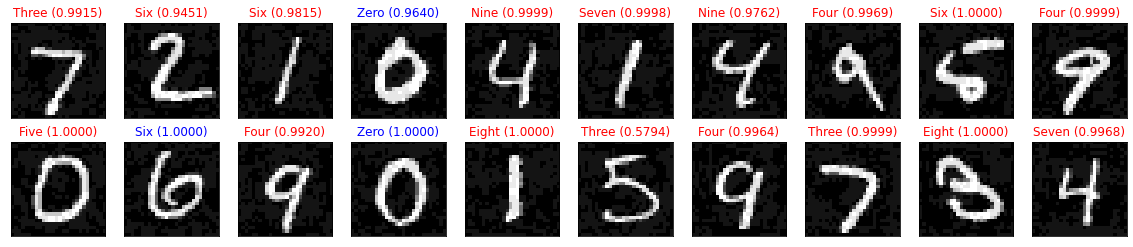

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  37.3589
Average L2 Norm:  0.0546
Average L_inf Norm:  0.0011


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 10.5581 - accuracy: 0.2900

Model Accuracy on test images:  0.29
Model Loss on test images:  10.5581


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

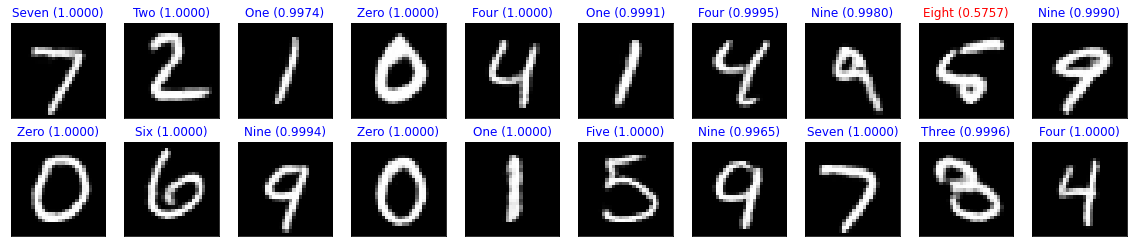

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9132

Average Peak Signal-to-Noise Ratio between original and restored Examples: 69.918274


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.2613 - accuracy: 0.9560

Model Accuracy on restored images:  0.956
Model Loss on test images:  0.2613


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9835


# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2BasicIterativeAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.8)

# adversarial purtubation
perturb = adv_img - x_test

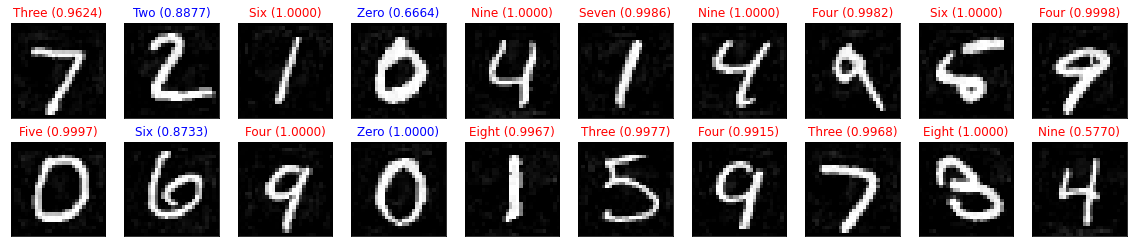

In [ ]:
adv_pred = model.predict(adv_img.numpy())

fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  12.7833
Average L2 Norm:  0.0247
Average L_inf Norm:  0.0012


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 7.0453 - accuracy: 0.2980

Model Accuracy on test images:  0.298
Model Loss on test images:  7.0453


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove BIM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_bim.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

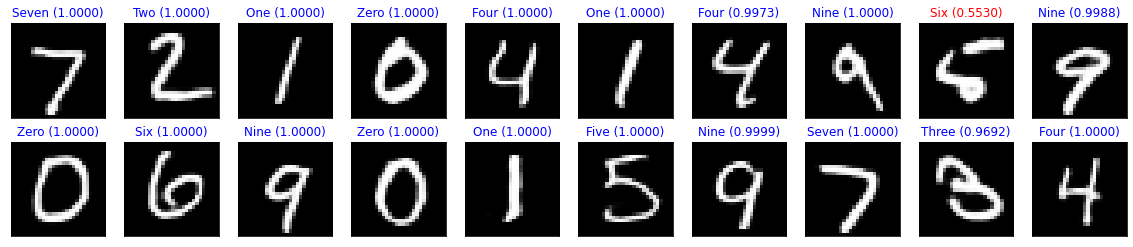

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.9763

Average Peak Signal-to-Noise Ratio between original and restored Examples: 75.829575


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9530

Model Accuracy on restored images:  0.953
Model Loss on test images:  0.222


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9805


#3. Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.PGD()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 0.1)

# adversarial purtubation
perturb = adv_img - x_test

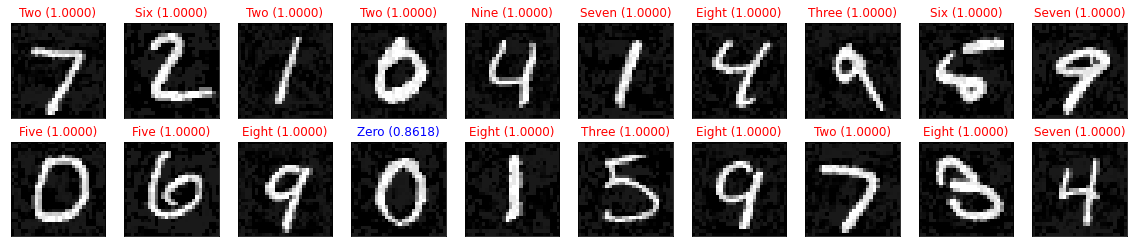

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  39.689
Average L2 Norm:  0.058
Average L_inf Norm:  0.0011


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 19.2854 - accuracy: 0.0340

Model Accuracy on test images:  0.034
Model Loss on test images:  19.2854


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove PGD putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_pgd.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

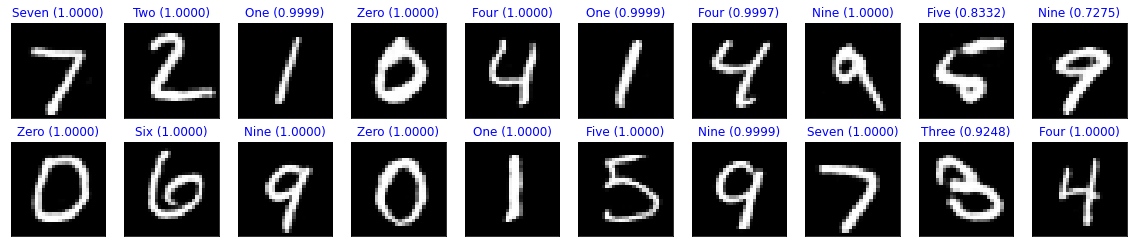

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test, denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.981

Average Peak Signal-to-Noise Ratio between original and restored Examples: 76.65776


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.9620

Model Accuracy on restored images:  0.962
Model Loss on test images:  0.2034


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9897


#4. Deep Fool Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2DeepFoolAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 1.1)

# adversarial purtubation
perturb = adv_img - x_test

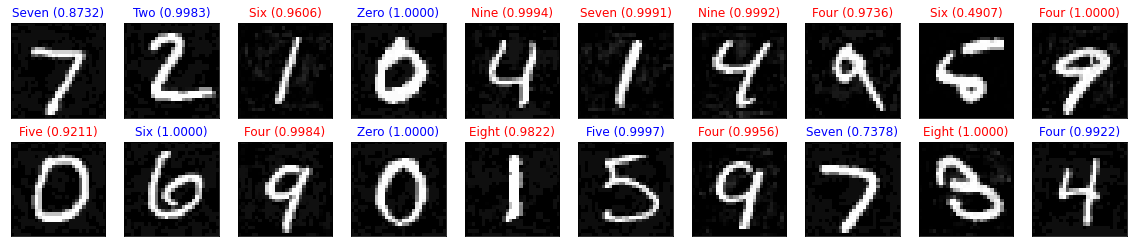

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  18.7453
Average L2 Norm:  0.0337
Average L_inf Norm:  0.0012


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 4ms/step - loss: 5.1576 - accuracy: 0.4580

Model Accuracy on test images:  0.458
Model Loss on test images:  5.1576


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove DFA putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_dfa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

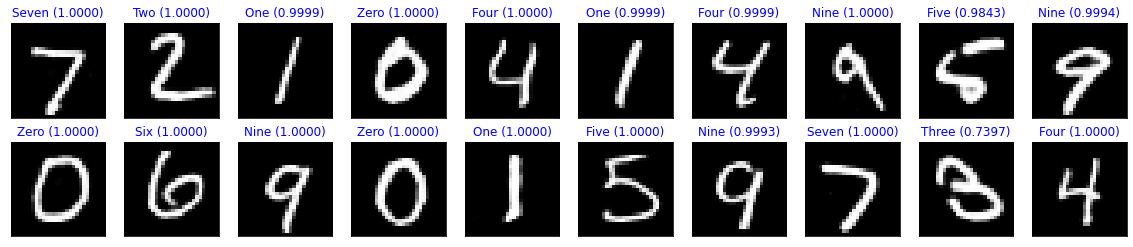

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.978

Average Peak Signal-to-Noise Ratio between original and restored Examples: 76.313934


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.1462 - accuracy: 0.9630

Model Accuracy on restored images:  0.963
Model Loss on test images:  0.1462


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9907


# 5. Carlini and Wanger Attack

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.L2CarliniWagnerAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c, epsilons = 4)

# adversarial purtubation
perturb = adv_img - x_test

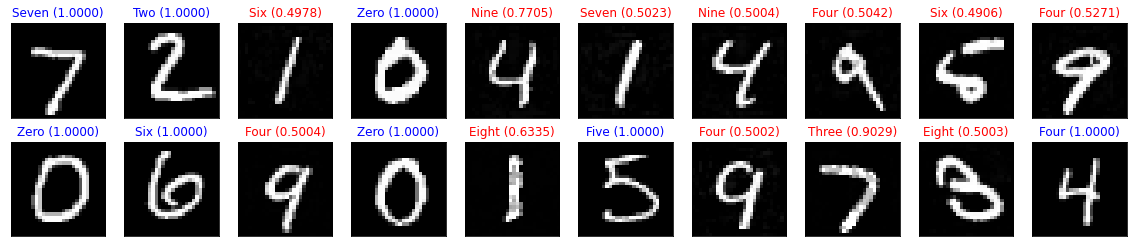

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  23.2035
Average L2 Norm:  0.0831
Average L_inf Norm:  0.0017


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.3850

Model Accuracy on test images:  0.385
Model Loss on test images:  0.7019


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/mnist_cwa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

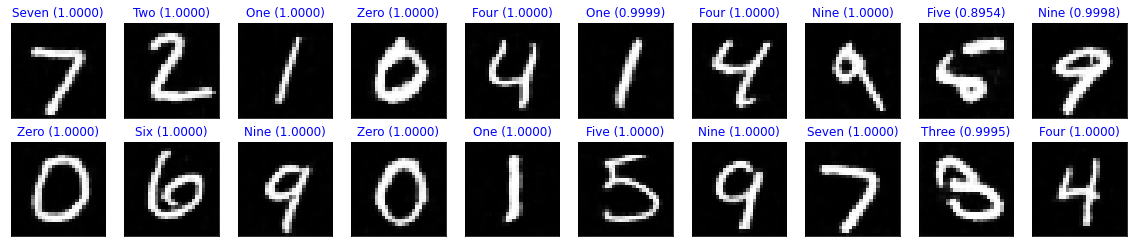

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test, denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.945

Average Peak Signal-to-Noise Ratio between original and restored Examples: 75.50161


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9690

Model Accuracy on restored images:  0.969
Model Loss on test images:  0.1461


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9969


# 6. Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
#!pip install foolbox
import foolbox
import eagerpy as ep

In [ ]:
images = tf.cast(x_test, dtype = tf.float32)
labels = tf.cast(y_test, dtype = tf.int32)

print(images.shape)
print(labels.shape)

(1000, 28, 28, 1)
(1000,)


In [ ]:
# create fool Model
fmodel = foolbox.models.TensorFlowModel(model = model, bounds = (0, 255))

# set criteria
c = foolbox.criteria.Misclassification(labels)

eps = [0.3]

# create attack
attack = foolbox.attacks.SpatialAttack()

# create adversarial example
raw_adv, adv_img, success = attack(fmodel, images, criterion = c)

# adversarial purtubation
perturb = adv_img - x_test

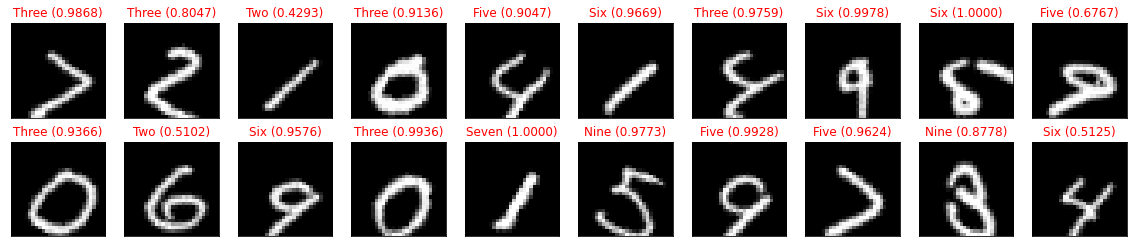

In [ ]:
adv_pred = model.predict(adv_img.numpy())
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_img[idx].numpy().reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title('%s (%.4f)' %(class_names[np.argmax(adv_pred[idx])], adv_pred[idx].max()), color = color)

In [ ]:
print("Average L1 Norm: ", round(tf.norm(perturb, ord = 1).numpy() / len(x_test), 4))
print("Average L2 Norm: ", round(tf.norm(perturb, ord = 2).numpy()/ len(x_test), 4))
print("Average L_inf Norm: ", round(tf.norm(perturb - x_test, ord = np.inf).numpy()/ len(x_test), 4))

Average L1 Norm:  125.9631
Average L2 Norm:  0.3089
Average L_inf Norm:  0.002


In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_img.numpy(), y_test)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 16.0816 - accuracy: 0.0000e+00

Model Accuracy on test images:  0.0
Model Loss on test images:  16.0816


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/Generative_Models/autoencoder_mnist_spa.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
denise_images =d_model.predict(adv_img.numpy())

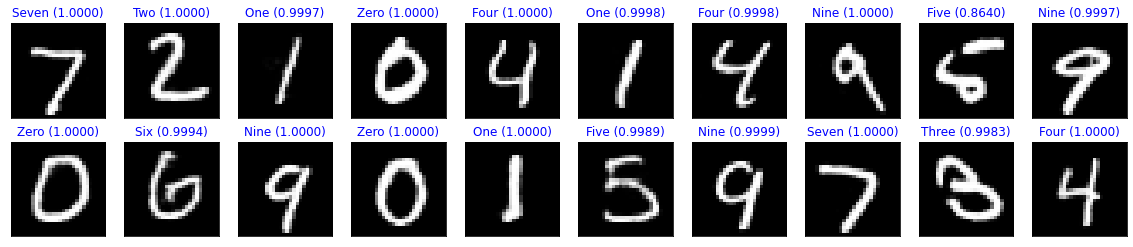

In [ ]:
# predict some restored images
predictions = model.predict(denise_images)

# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(denise_images[idx].reshape(28, 28), cmap = 'gray')
  plt.title('%s (%.4f)' %(class_names[np.argmax(predictions[idx])], predictions[idx].max()), color =  color)
  

In [ ]:
ssim = tf.image.ssim(x_test,denise_images , max_val = 1, filter_size = 11, filter_sigma = 1.5, k1 = 0.01, k2 = 0.03)
ssim = ssim.numpy()
print("Average Structure Similarity Index between original and restored Examples:", round(ssim.mean(), 4))
print()

psnr = tf.image.psnr(x_test, denise_images, max_val = 255)
psnr = psnr.numpy()
print("Average Peak Signal-to-Noise Ratio between original and restored Examples:", psnr.mean())

Average Structure Similarity Index between original and restored Examples: 0.8991

Average Peak Signal-to-Noise Ratio between original and restored Examples: 73.31431


In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(denise_images, y_test)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.2723 - accuracy: 0.9680

Model Accuracy on restored images:  0.968
Model Loss on test images:  0.2723


In [ ]:
print('Sucess rate of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess rate of Defence Model:  0.9959
